Property Price Prediction Project

**Problem Objective :**
The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

**Step 1:** Import Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
import os
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
import pickle
import IPython
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler # This module is used for normalization 
warnings.filterwarnings('ignore')
print("Libraries Imported")

Libraries Imported


**Step 2:** Load Data and create DataFrame

In [29]:
data_dict=fetch_california_housing()
data_dict.keys()
# print(type(data_dict))


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [30]:
data_dict['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [31]:
data_dict['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [32]:
df=pd.DataFrame(data_dict['data'], columns=[data_dict['feature_names']])
df['MedHouseVal']=data_dict['target']
print("data loaded successfully")

data loaded successfully


In [33]:
print(data_dict['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

**Step 3:** Understanding Data using EDA

In [34]:
df.shape

(20640, 9)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (MedInc,)       20640 non-null  float64
 1   (HouseAge,)     20640 non-null  float64
 2   (AveRooms,)     20640 non-null  float64
 3   (AveBedrms,)    20640 non-null  float64
 4   (Population,)   20640 non-null  float64
 5   (AveOccup,)     20640 non-null  float64
 6   (Latitude,)     20640 non-null  float64
 7   (Longitude,)    20640 non-null  float64
 8   (MedHouseVal,)  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [36]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [37]:
display(df.sample(2))
#Multiple MedHaouseVal with $100,000

'''The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).'''

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
949,4.4697,26.0,5.943925,0.992212,1935.0,3.014019,37.72,-121.93,2.213
5856,4.6898,45.0,5.039216,1.013725,1256.0,2.462745,34.18,-118.33,2.260


'The target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).'

In [38]:
'''ALl the values are already in numeric so we dont need to perform encodeing'''

'ALl the values are already in numeric so we dont need to perform encodeing'

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


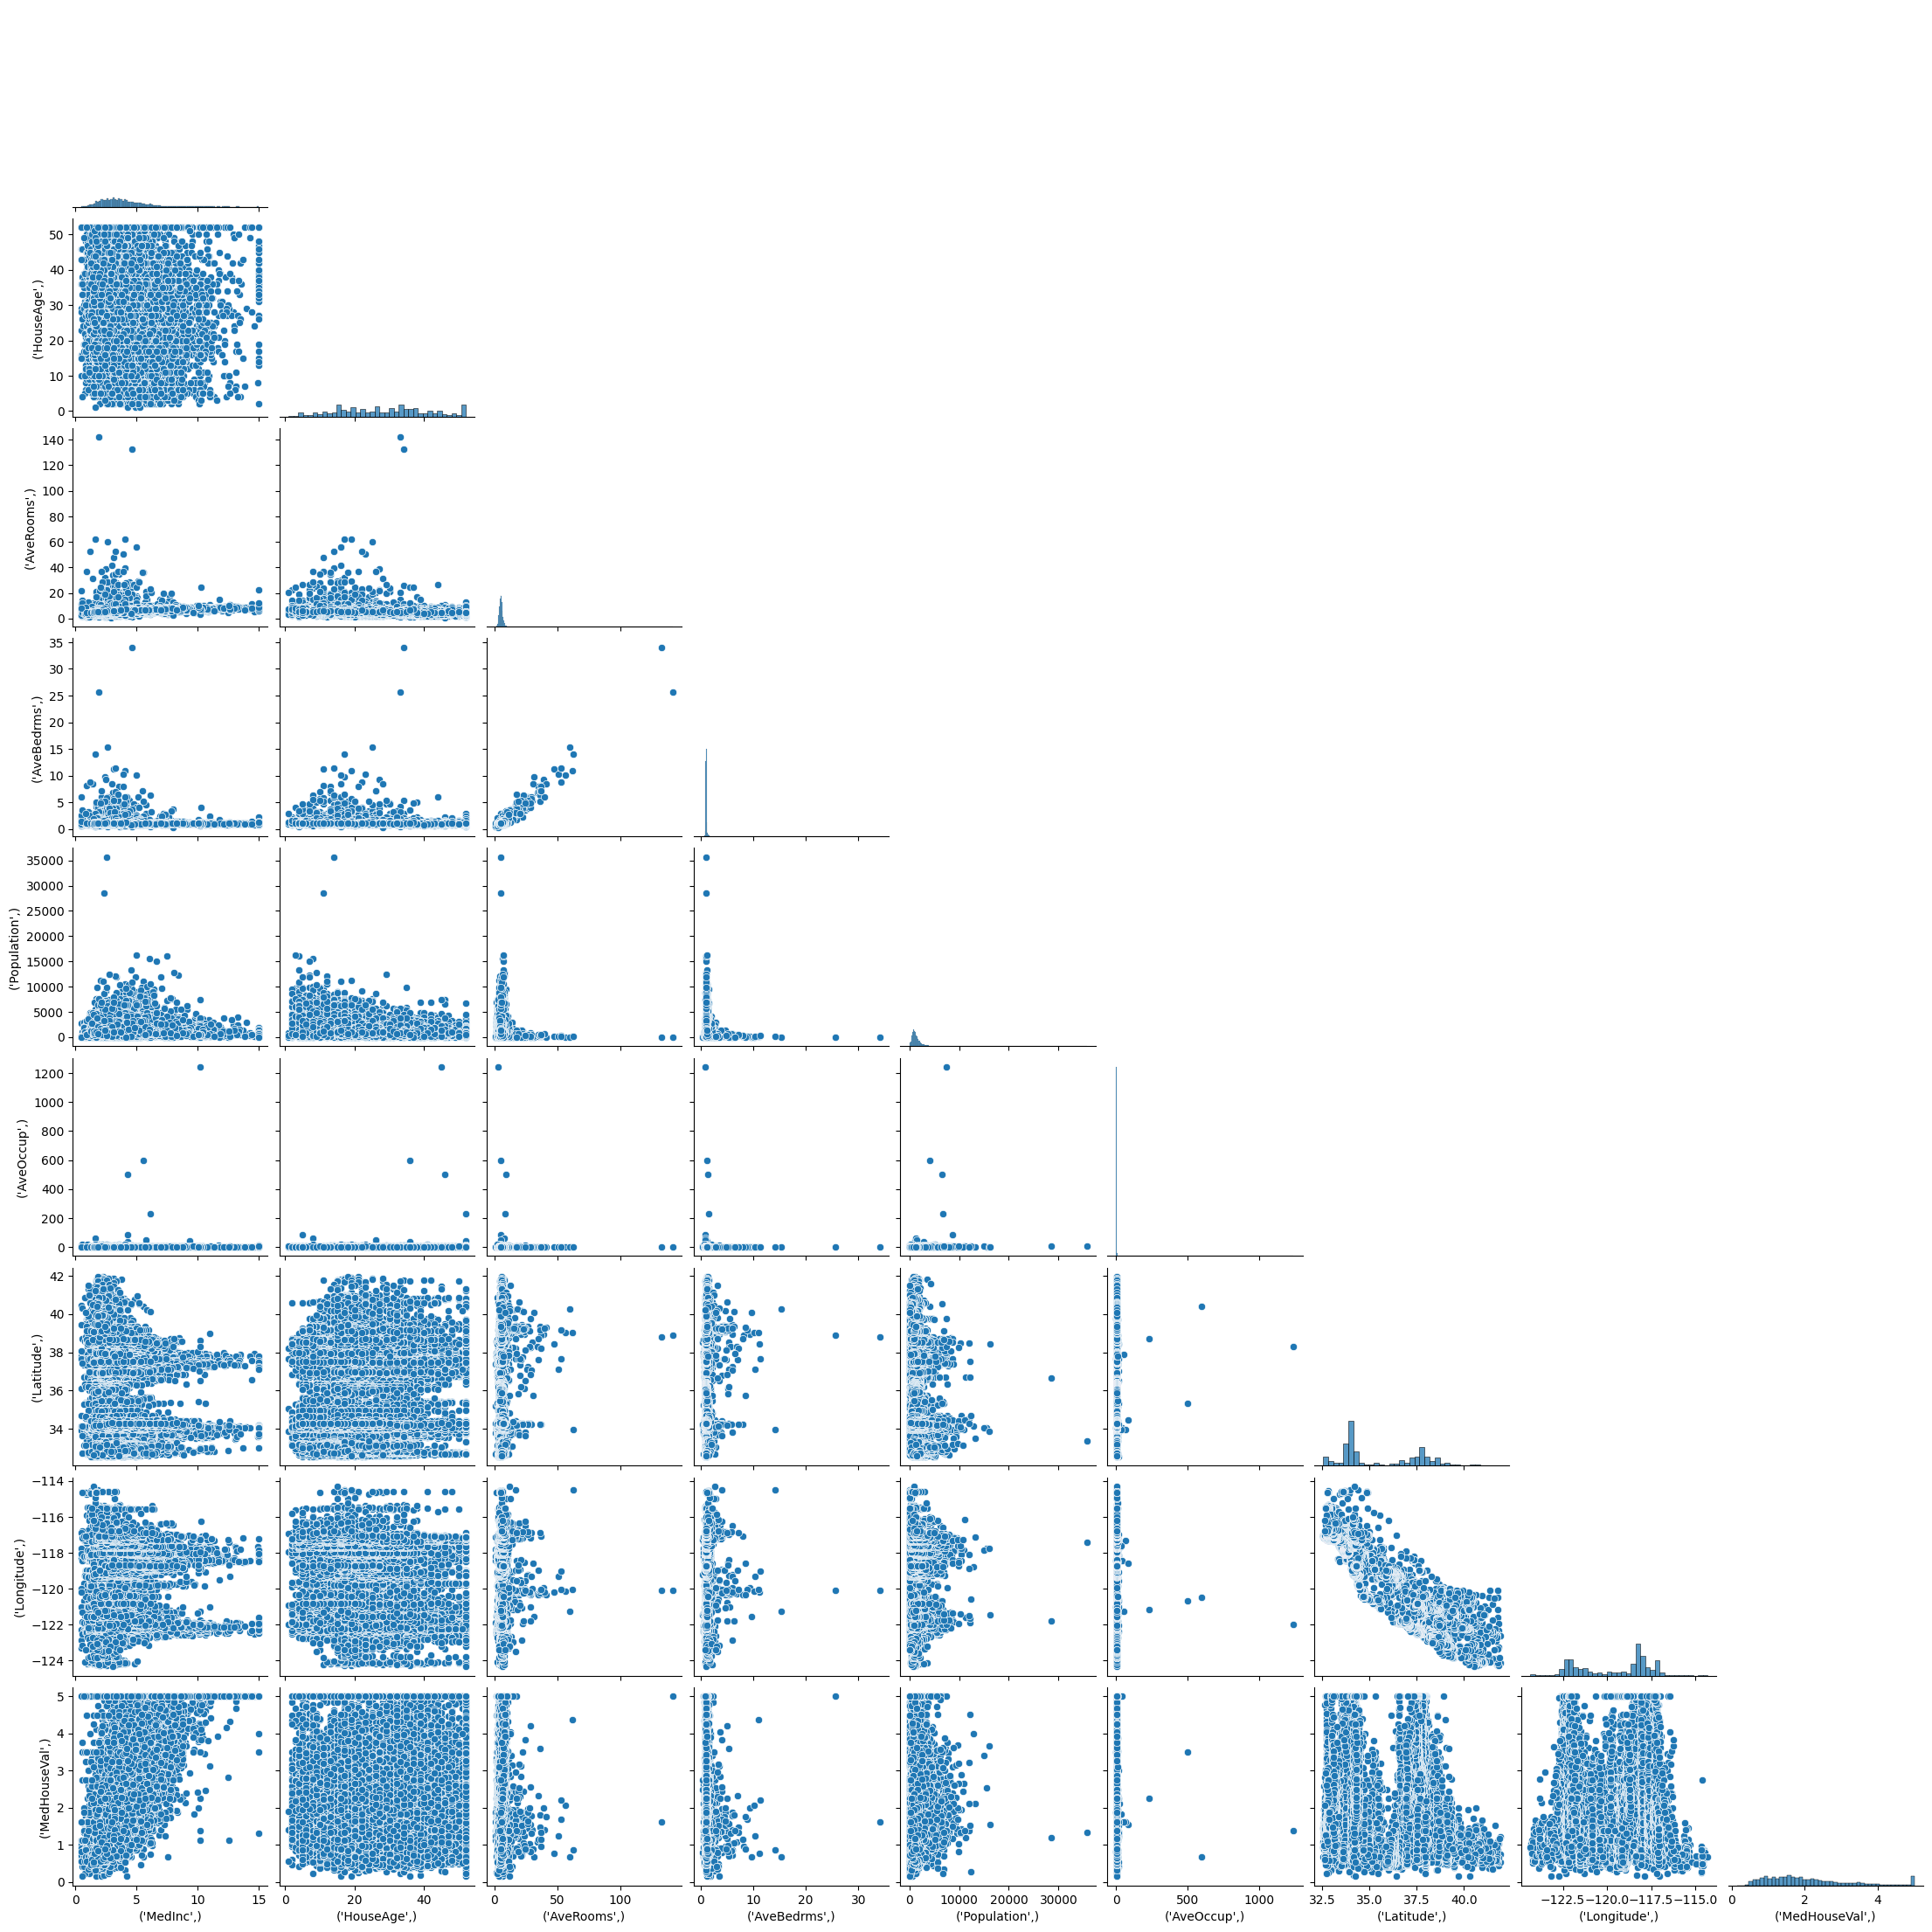

In [39]:
#Now using poirplot to check the correlation 
#pairplot will show us the correlation at one go for numeric vs numeric data
display(df.corr())
sns.pairplot(data=df, corner=True)
plt.show() 

<Axes: title={'center': 'Features V/S Target'}, xlabel='None', ylabel='None'>

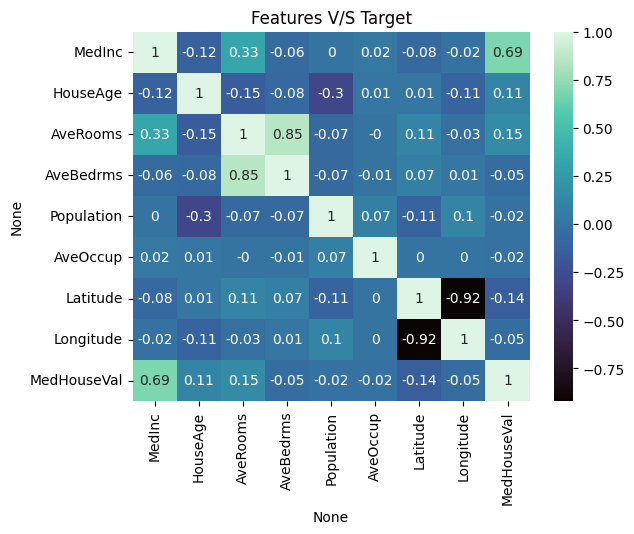

In [40]:
plt.title("Features V/S Target")
sns.heatmap(df.corr().round(2) ,annot=True, cmap='mako')

In [41]:
'''As we can see, the median house value increases when the median Income increases. 
median income and median house value has the highest correlation'''

'As we can see, the median house value increases when the median Income increases. \nmedian income and median house value has the highest correlation'

In [42]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


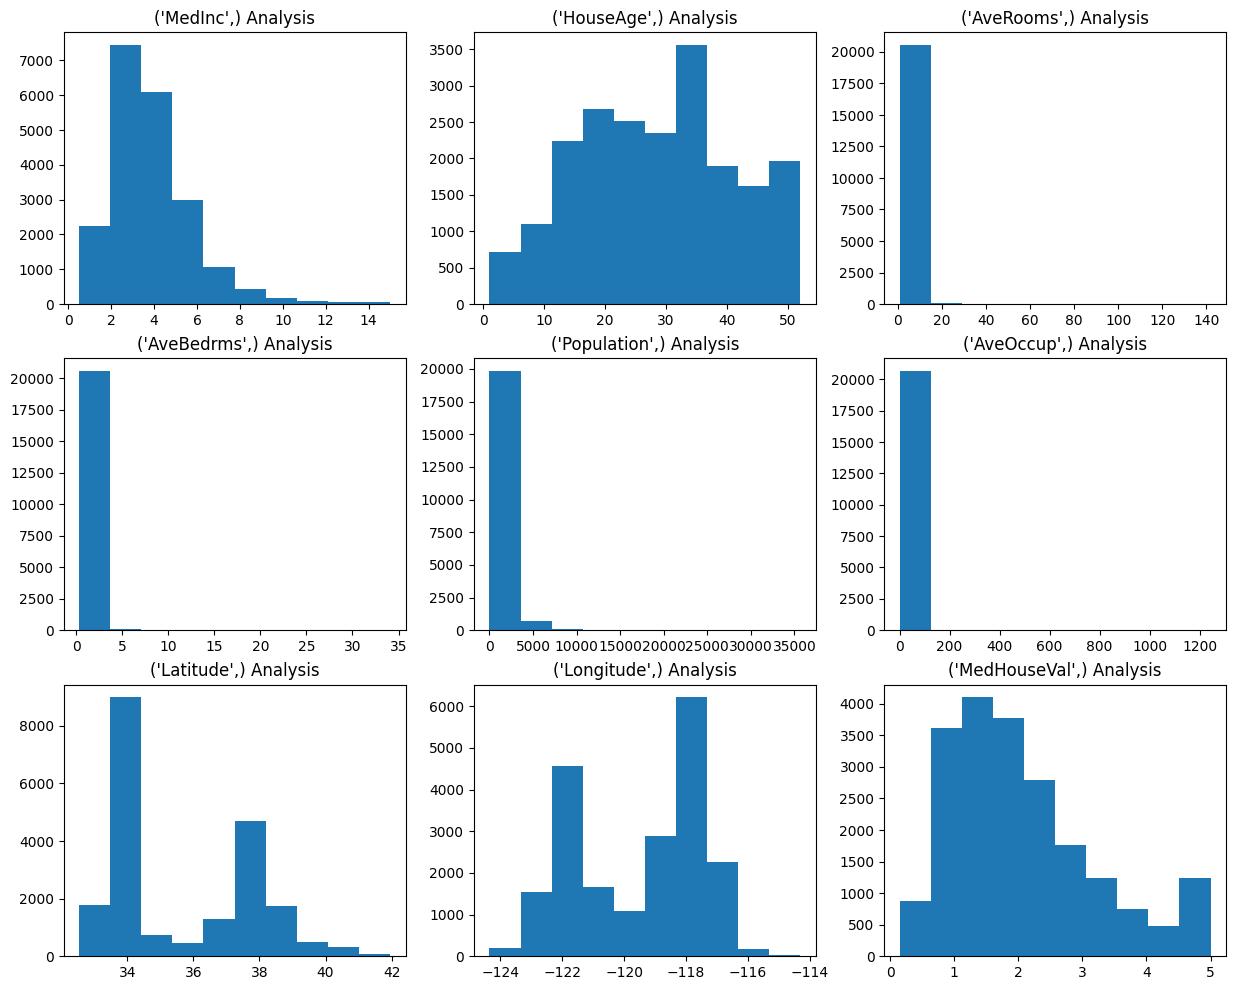

In [43]:
plt.figure(figsize=(15,12))
for i,j in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    plt.hist(df[j])
    plt.title(f'{j} Analysis')
plt.show()

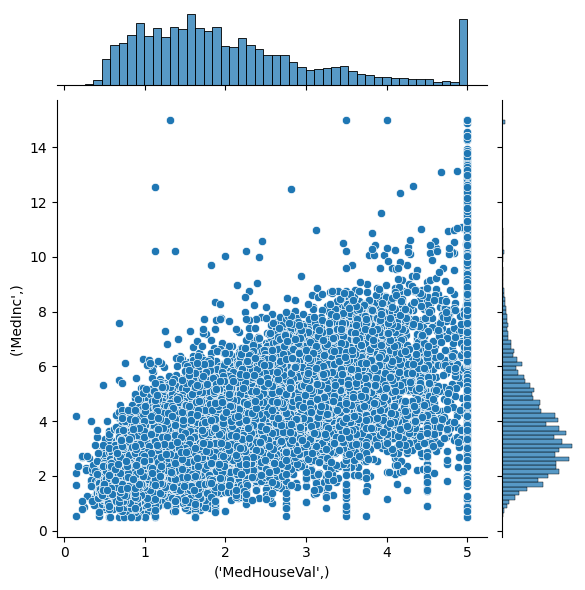

In [44]:
sns.jointplot(data=df, x=('MedHouseVal',), y=('MedInc',))
plt.show()

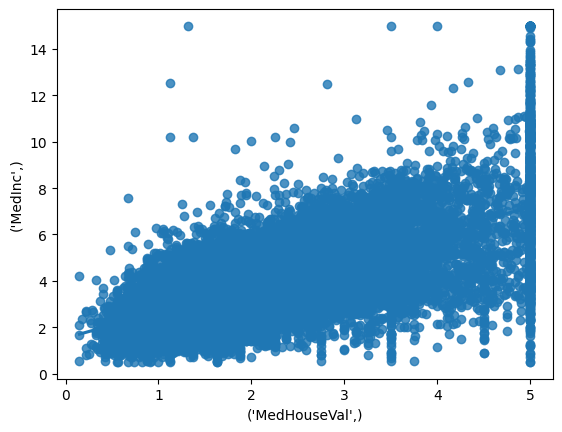

In [45]:
# Distribution of target value ('MedHouseVal)
sns.regplot(data=df, x='MedHouseVal', y='MedInc')
plt.show()

In [46]:
# df['MedHouseVal']

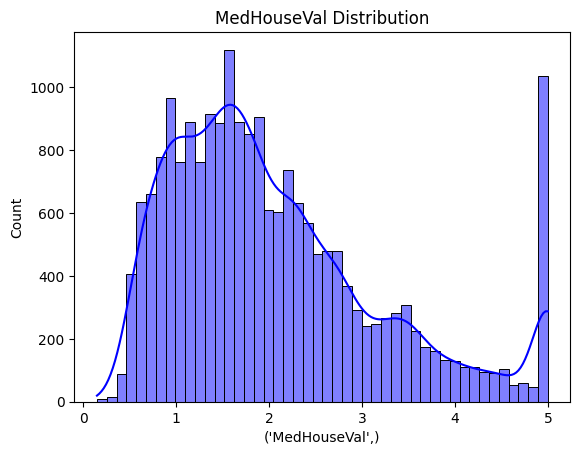

In [47]:
plt.title('MedHouseVal Distribution')
sns.histplot(data = df, x = ('MedHouseVal',), color = 'b', kde=True)
plt.show()

In [48]:
df['MedHouseVal'].describe()

,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


**Step 4:** Feature Engineering

In [49]:
#Normalization make the same data but compress it between 0 to 1
#Standardization make s the mean of the data = 1, make the same data as the current data to negatice side of the graph

In [50]:
#We'll only provide the x values (input) to the feature engineering
#so we need to separate it from the y (tarket column) (MedHouseValue)

In [51]:
X=df.iloc[:,:-1]
y=df['MedHouseVal']
X.sample(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
18008,5.3294,25.0,5.527665,1.002699,2027.0,2.735493,37.29,-121.97
12584,2.7697,38.0,5.473684,1.021053,995.0,2.618421,38.52,-121.44


In [52]:
scaler=MinMaxScaler()
scaler.fit(X) #Learning: fitting data between 0 and 1 (Normalization)
X_scaled=scaler.transform(X)
print('Done')

Done
